<img src="images/scipy-la-2022_logo.png" alt="drawing" width="400"/>

![banner](images/banner.png)

### Recursos para enseñar con Jupyter 
#### Fecha: 
####  Sofía Martin, Ariel Ramos, Liliana Hurtado

## Experiencia Práctica
* ¿qué datos me tenemos, cómo los analizamos?
* ¿Es lo mismo que en una planilla de cálculo?

        

## Áreas de aplicación de La Ciencia de Datos
* Investigación
* Indsutria
* servicios
* Salud
* Machine Learning - Inteligencia artificial

Vamos a usar datos del ministerio de salud sobre nacimientos en el país entre 2005 y 2010 para hacer algunas preguntas y obtener una respuesta visual con gráficos

# Qué información podemos obtener:
* El porcentaje de bebés según sexo
* Proporción de madres por edad
* ¿Cuántos nacimientos hay por año en el país según el grupo etario de la madre? 

* ¿Cuántos nacidos hay por año en el país según el grupo etario de la madre?
* Para cada nivel de instrucción/educación, ¿Cuántos nacimientos hubo en cada grupo etario?

Los datos fueron descargados de la página oficial del [Ministerio de salud](http://datos.salud.gob.ar/dataset/nacidos-vivos-registrados-por-jurisdiccion-de-residencia-de-la-madre-republica-argentina-ano-2017/archivo/3c891522-8448-4490-a7da-6deba78d3b32)

¿Qué librería usamos en el cuaderno anterior para graficar?

¿Cómo la importamos?


In [63]:
import matplotlib.pyplot as grafica

* La librería es: [**matplotlib**](https://matplotlib.org/) (conjunto de módulos)
* el módulo dentro de la librería es: **plot**
* Renombro el módulo para utilizarlo como **grafica**
* [Pandas](https://aprendeconalf.es/docencia/python/manual/pandas/): una herramienta extremadamente versátil y eficiente para procesar estructuras de datos. La importamos?


In [20]:
import pandas as pd

In [31]:
nacimientos = pd.read_csv("Nacimientos_Arg_2005-2010.csv",encoding = "UTF-8")

Conozcamos un poco nuestros datos:

In [32]:
nacimientos.head()

,anio,jurisdiccion_de_residencia_id,jurisdicion_residencia_nombre,edad_madre_grupo_id,edad_madre_grupo,instruccion_madre,semana_gestacion_id,semana_gestacion,intervalo_peso_al_nacer,Sexo,nacimientos_cantidad
0,2005,2,Ciudad Autónoma de Buenos Aires,5,30 a 34,Secundaria/Polimodal Incompleta,4,28 a 31,1500 a 1999,masculino,1
1,2005,2,Ciudad Autónoma de Buenos Aires,5,30 a 34,Primaria/C. EGB Completa,4,28 a 31,500 a 999,masculino,2
2,2005,2,Ciudad Autónoma de Buenos Aires,4,25 a 29,Secundaria/Polimodal Completa,4,28 a 31,1000 a 1499,masculino,6
3,2005,2,Ciudad Autónoma de Buenos Aires,5,30 a 34,Secundaria/Polimodal Incompleta,5,32 a 36,1500 a 1999,masculino,5
4,2005,2,Ciudad Autónoma de Buenos Aires,4,25 a 29,Secundaria/Polimodal Completa,4,28 a 31,1500 a 1999,masculino,1


En las columnas tenemos las caracaterísticas de cada entrada en la tabla, veamos qué información tenemos

In [33]:
nacimientos.columns

Index(['anio', 'jurisdiccion_de_residencia_id',
       'jurisdicion_residencia_nombre', 'edad_madre_grupo_id',
       'edad_madre_grupo', 'instruccion_madre', 'semana_gestacion_id',
       'semana_gestacion', 'intervalo_peso_al_nacer', 'Sexo',
       'nacimientos_cantidad'],
      dtype='object')

## Queremos saber el porcentaje de bebés según sexo

In [39]:
nacimientos['Sexo'].unique()

array(['masculino', 'femenino', 'indeterminado', 'desconocido'],
      dtype=object)

Umm *indeterminado* y *desconocido*, serían lo mismo, reescribamos uno de ellos por el otro

In [40]:
nacimientos_mod = nacimientos.replace(to_replace='indeterminado', value='desconocido')

In [41]:
nacimientos_mod['Sexo'].unique()

array(['masculino', 'femenino', 'desconocido'], dtype=object)

In [43]:
nacimientos_mod.groupby("sexo")["sexo"].count()

KeyError: 'sexo'

¿Cuál fue el error?
> Sexo es igual que sexo?

In [45]:
nacimientos_mod.groupby("Sexo")["Sexo"].count()

Sexo
desconocido      4387
femenino       244035
masculino      249552
Name: Sexo, dtype: int64

Y si lo graficamos para ver mejor las cantidades

<AxesSubplot:ylabel='Sexo'>

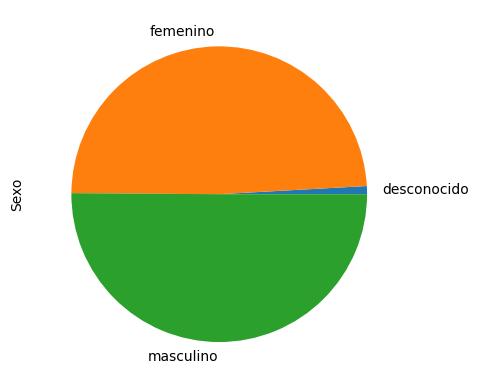

In [46]:
nacimientos_mod.groupby("Sexo")["Sexo"].count().plot(kind='pie')

## Proporción de madres por edad

> ¿Qué columnas nos van a interesar?

* edad_madre_grupo
* nacimientos_cantidad

Si no estamos seguros qué información contienen las columnas:
* 'edad_madre_grupo_id'
* 'edad_madre_grupo'

> Son similares en el nombre, consultemos el contenido de ambas

In [27]:
nacimientos[['edad_madre_grupo_id', 'edad_madre_grupo']]

,edad_madre_grupo_id,edad_madre_grupo
0,5,30 a 34
1,5,30 a 34
2,4,25 a 29
3,5,30 a 34
4,4,25 a 29
...,...,...
497969,5,30 a 34
497970,5,30 a 34
497971,4,25 a 29
497972,5,30 a 34


¿Cuántos grupos de edades hay?

In [28]:
nacimientos['edad_madre_grupo'].unique()

array(['30 a 34', '25 a 29', '20 a 24', '15 a 19', 'Sin especificar',
       '40 a 44', 'De 45 y más', ' Menor de 15', '35 a 39'], dtype=object)

Para no trabajar con todas las columnas que no nos interesan, vamos a quedarnos solamente con las referidas a la consulta que queremos realizar:
* edad_madre_grupo
* nacimientos_cantidad

In [47]:
nac_grupo_edad = nacimientos[['edad_madre_grupo','nacimientos_cantidad']]

In [48]:
nac_grupo_edad

,edad_madre_grupo,nacimientos_cantidad
0,30 a 34,1
1,30 a 34,2
2,25 a 29,6
3,30 a 34,5
4,25 a 29,1
...,...,...
497969,30 a 34,1
497970,30 a 34,1
497971,25 a 29,1
497972,30 a 34,1


Y graficamos!!!

<AxesSubplot:ylabel='nacimientos_cantidad'>

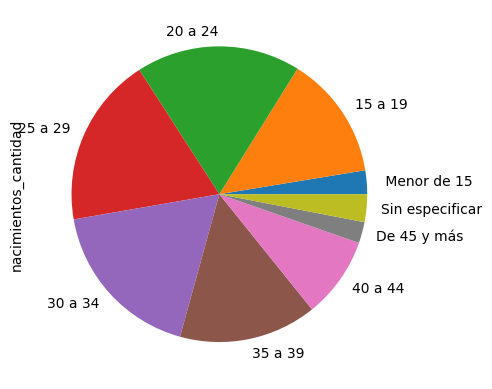

In [49]:
nac_grupo_edad.groupby("edad_madre_grupo")["nacimientos_cantidad"].count().plot(kind='pie')

¿Qué porción es mayor entre las siguientes partes :
* 30 a 34
* 35 a 39
* 25 a 29

<AxesSubplot:ylabel='nacimientos_cantidad'>

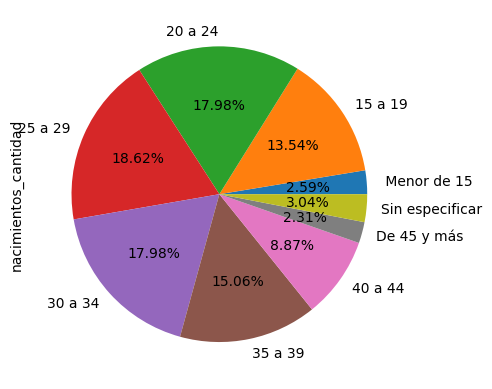

In [19]:
nac_may_menor_20.groupby("edad_madre_grupo")["nacimientos_cantidad"].count().plot(kind='pie', autopct='%1.2f%%')

En este caso necesitamos saber el año, el grupo etario de la madre y la cantidad:

In [58]:
nac_edad_madre = nacimientos[["anio","edad_madre_grupo","nacimientos_cantidad"]]
nac_edad_madre 

,anio,edad_madre_grupo,nacimientos_cantidad
0,2005,30 a 34,1
1,2005,30 a 34,2
2,2005,25 a 29,6
3,2005,30 a 34,5
4,2005,25 a 29,1
...,...,...,...
497969,2017,30 a 34,1
497970,2017,30 a 34,1
497971,2007,25 a 29,1
497972,2017,30 a 34,1


Hay algunos nacimientos donde el grupo etario de la madre no fue especificado ->**sin especificar** 

Por lo tanto no podemos sacar conclusiones, asi que se ignoran.

In [59]:
nac_edad_madre = nac_edad_madre.copy()
nac_edad_madre.drop(nac_edad_madre.index[nac_edad_madre['edad_madre_grupo'] == "Sin especificar"], inplace = True)

Ahora con la información filtrada, hay que agrupar por dos criterios, primero por el año y luego por el grupo etario y finalmente sumar las cantidades de estos grupos:

In [60]:
nac_edad_madre = nac_edad_madre.groupby(["anio","edad_madre_grupo"]).sum()
nac_edad_madre.head()

nacimientos_cantidad
anio edad_madre_grupo                      
2005  Menor de 15                      2699
     15 a 19                         104410
     20 a 24                         177813
     25 a 29                         182778
     30 a 34                         141689

La información como está no puede ser graficada, ya que está toda junta en 2 grupos, asi que usamos la función .unstack(), que despliega la información para que se puede visualizar

In [61]:
nac_edad_madre = nac_edad_madre.unstack()
nac_edad_madre.head()

nacimientos_cantidad                                          \
edad_madre_grupo          Menor de 15 15 a 19 20 a 24 25 a 29 30 a 34 35 a 39   
anio                                                                            
2005                             2699  104410  177813  182778  141689   73194   
2006                             2766  103885  174342  176931  139003   73177   
2007                             2841  106720  174679  175632  139393   73532   
2008                             2937  112034  183265  184978  153805   80258   
2009                             3346  113478  182747  178935  155464   81397   

                                      
edad_madre_grupo 40 a 44 De 45 y más  
anio                                  
2005               21382        1575  
2006               19866        1488  
2007               19879        1497  
2008               20824        1630  
2009               20840        1546

Finalmente graficamos como en los ejemplos anteriores, con la diferencia de que ahora hay varios grupos lo que nos da varias líneas. No existe el mismo problema del eje y ya que ciertos grupos tienen muy pocos nacimientos y esto hace que el eje empiece en 0

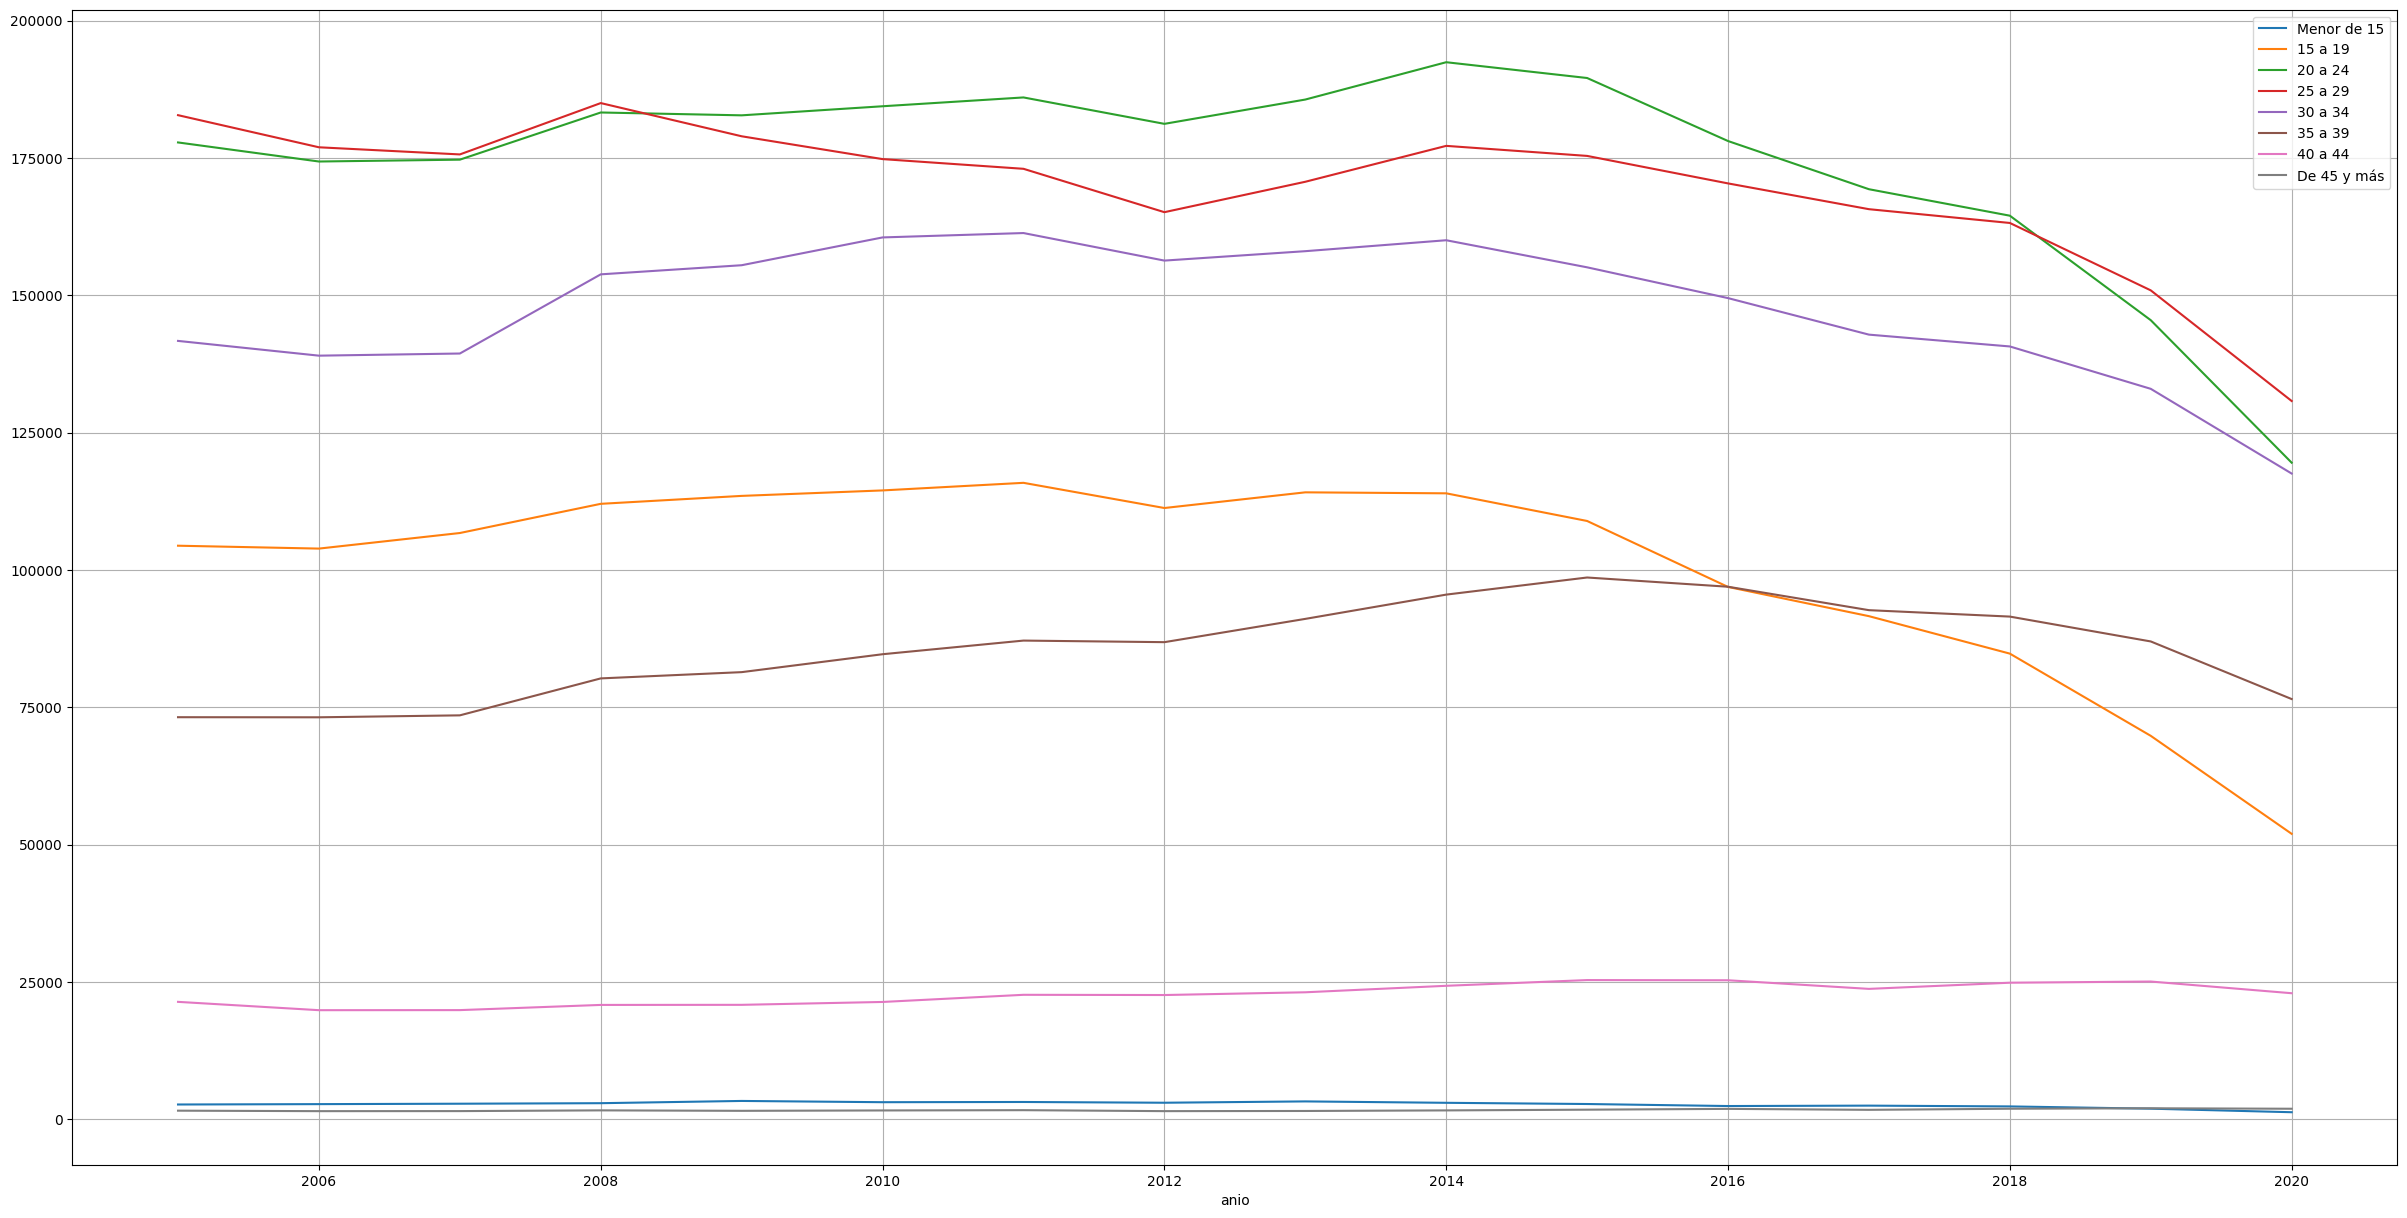

In [64]:
nac_edad_madre.plot(kind= "line",figsize= (30,15),grid=True)
grafica.legend(["Menor de 15", "15 a 19", "20 a 24", "25 a 29", "30 a 34", "35 a 39", "40 a 44", "De 45 y más"])

Guardemos la imagen 

## Proporción de madres tuvo hijos antes de los 20

Igual que los ejemplos anteriores, obtenemos las columnas de interés. Pero si consultamos cuáles son los valores únicos que tiene la columna "edad_madre:grupo" nos encontramos con filas que no tienen información significativa

In [65]:
nac_madre_menor_20 = nacimientos[["edad_madre_grupo","nacimientos_cantidad"]]
nac_madre_menor_20["edad_madre_grupo"].unique()

array(['30 a 34', '25 a 29', '20 a 24', '15 a 19', 'Sin especificar',
       '40 a 44', 'De 45 y más', ' Menor de 15', '35 a 39'], dtype=object)

Eliminamos las filas que dicen 'Sin especificar' 

In [66]:
nac_madre_menor_20 = nac_madre_menor_20.drop(nac_madre_menor_20[nac_madre_menor_20['edad_madre_grupo'] == "Sin especificar"].index)

<AxesSubplot:ylabel='nacimientos_cantidad'>

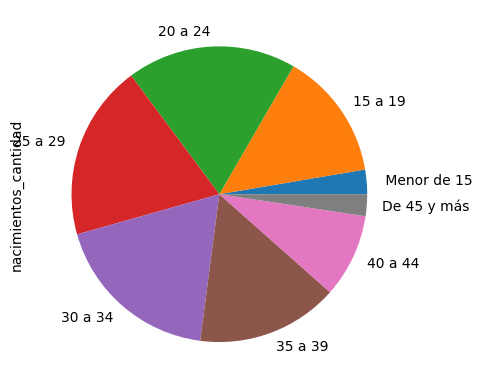

In [67]:
nac_madre_menor_20.groupby("edad_madre_grupo")["nacimientos_cantidad"].count().plot(kind='pie')

Luego agrupamos los nacimientos en dos categorías, basado en si cumple o no la condición: Si está en los grupos " Menor de 15" o "15 a 19", ponerlos en un  grupo, sino en otro grupo. (la | es el equivalente a un "o")

In [68]:
nac_madre_menor_20 = nac_madre_menor_20.groupby(
                        (nac_madre_menor_20.edad_madre_grupo == " Menor de 15") 
                        | (nac_madre_menor_20.edad_madre_grupo == "15 a 19"))

Luego sumamos los nacimientos de cada grupo:

In [69]:
nac_madre_menor_20 = nac_madre_menor_20.sum()
nac_madre_menor_20.head()

,nacimientos_cantidad
edad_madre_grupo,
False,9630285
True,1657570


Hay un problema con esta información, en la columna de grupo dece **True** y **False**, esto es por la operación de clasificación de más arriba. Esto se soluciona en el gráfico usando las etiquetas definidas en la lista etiquetas y pasandoselas al gráfico.

Finalmente, graficamos con un gráfico de torta para mostrar la propoción visualmente, agregando algunas cosas como los porcentajes (con autopct ='%.2f'), el título y el tamaño.

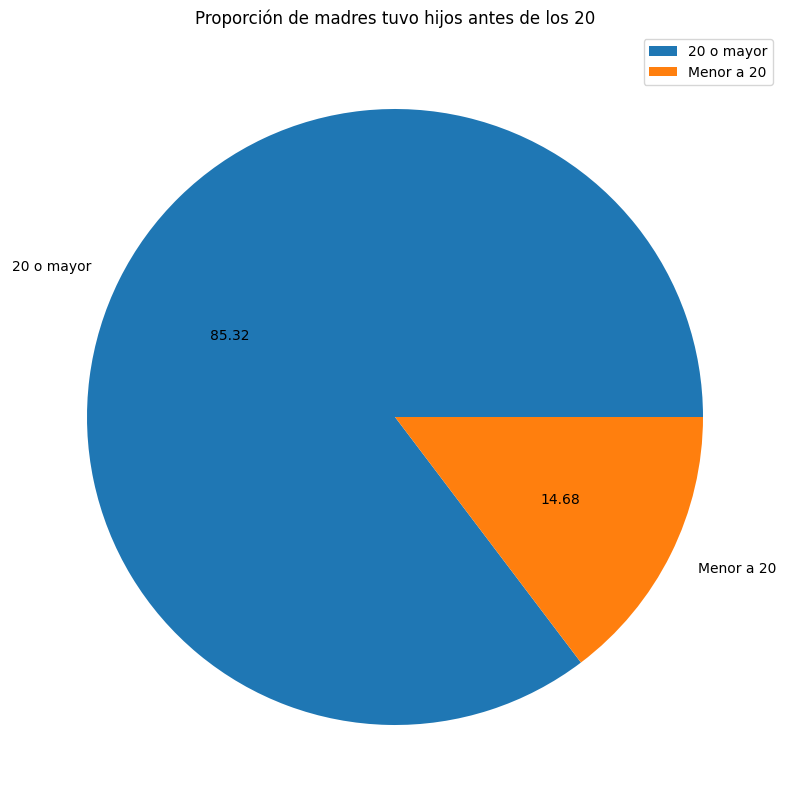

In [71]:
etiquetas= ["20 o mayor", "Menor a 20"]
nac_madre_menor_20.plot(kind='pie', y='nacimientos_cantidad', figsize=(10, 10),
                          autopct='%.2f',title = "Proporción de madres tuvo hijos antes de los 20",
                          labels=etiquetas
                        ,ylabel="")

grafica.legend(etiquetas)

## ¿Dónde podemos encontrar más datos?

**Argentina**

* 	**Datos Argentina** : https://datos.gob.ar/dataset
* 	**Buenos Aires Data**: https://data.buenosaires.gob.ar/
* **Datos de  provincia de Buenos Aires**: https://catalogo.datos.gba.gob.ar/
* **Datos de la ciudad de La Plata**:https://catalogodatos.laplata.gob.ar/dataset
* **Datos Abiertos de la provincia de Córdoba**: https://datosestadistica.cba.gov.ar/


**Nivel global**
* **Our World Data**: https://ourworldindata.org/
* **Data World** :https://data.world/
* **Kaggle**:https://www.kaggle.com/
* **Banco Mundial**: https://datos.bancomundial.org/


> En el caso de sitios no gubernamentales podemos encontrar datos de diferentes temáticas:

* **Datagénero**: https://linktr.ee/datagenero
* **IMDB** https://www.imdb.com/interfaces/